In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('C:/Users/Rahul Soni/Downloads/Screen Time Data.csv')

In [6]:
df

,index,Date,Week Day,Total Screen Time,Social Networking,Reading and Reference,Other,Productivity,Health and Fitness,Entertainment,Creativity,Yoga
0,0,04/17/19,Wednesday,187,89,17,41,22,0,0,0,0
1,1,04/18/19,Thursday,123,78,17,8,9,0,0,0,0
2,2,04/19/19,Friday,112,52,40,8,4,0,3,0,0
3,3,04/20/19,Saturday,101,69,9,38,2,0,3,0,0
4,4,04/21/19,Sunday,56,35,2,43,3,0,1,1,0
5,5,04/22/19,Monday,189,68,0,9,3,4,0,0,0
6,6,04/23/19,Tuesday,158,56,18,41,12,15,0,0,0
7,7,04/24/19,Wednesday,135,98,3,33,16,0,0,0,0
8,8,04/25/19,Thursday,52,25,7,3,16,0,0,0,0
9,9,04/26/19,Friday,198,76,8,29,15,0,32,0,0


In [34]:
df.head()

,index,Date,Week Day,Total Screen Time,Social Networking,Reading and Reference,Other,Productivity,Health and Fitness,Entertainment,Creativity,Yoga
0,0,04/17/19,Wednesday,187,89,17,41,22,0,0,0,0
1,1,04/18/19,Thursday,123,78,17,8,9,0,0,0,0
2,2,04/19/19,Friday,112,52,40,8,4,0,3,0,0
3,3,04/20/19,Saturday,101,69,9,38,2,0,3,0,0
4,4,04/21/19,Sunday,56,35,2,43,3,0,1,1,0


In [36]:
df.isnull().sum()

index                    0
Date                     0
Week Day                 0
Total Screen Time        0
Social Networking        0
Reading and Reference    0
Other                    0
Productivity             0
Health and Fitness       0
Entertainment            0
Creativity               0
Yoga                     0
dtype: int64

In [38]:
df.duplicated().sum()

0

In [40]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [10]:
import seaborn as sns

<Axes: xlabel='Productivity', ylabel='Count'>

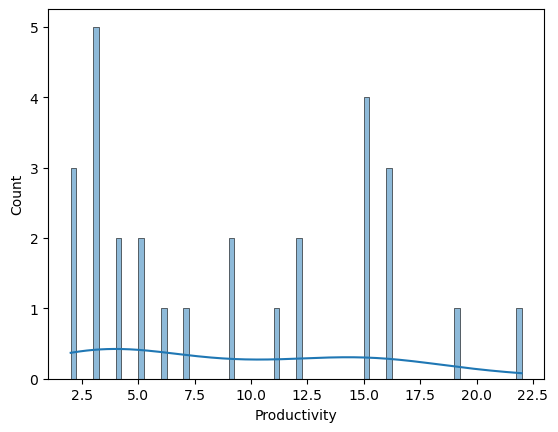

In [42]:
sns.histplot(df['Productivity'], bins=80, kde=True)

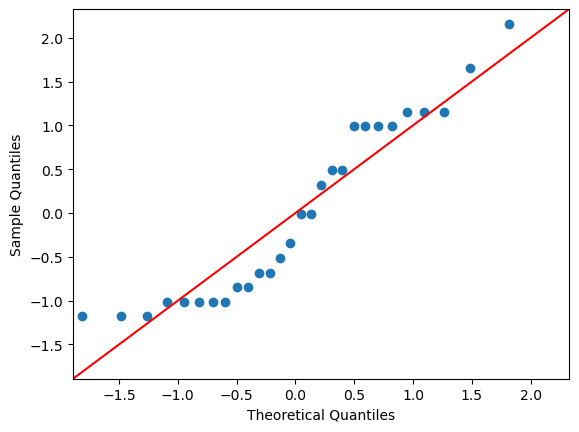

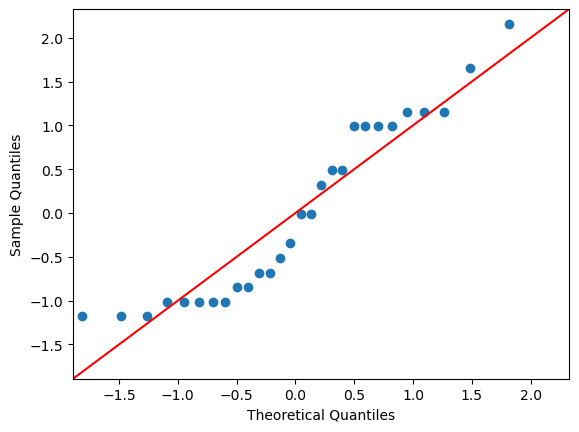

In [44]:
import statsmodels.api as sm
import scipy.stats as stats
sm.qqplot(df['Productivity'], line='45', fit=True, dist=stats.norm)

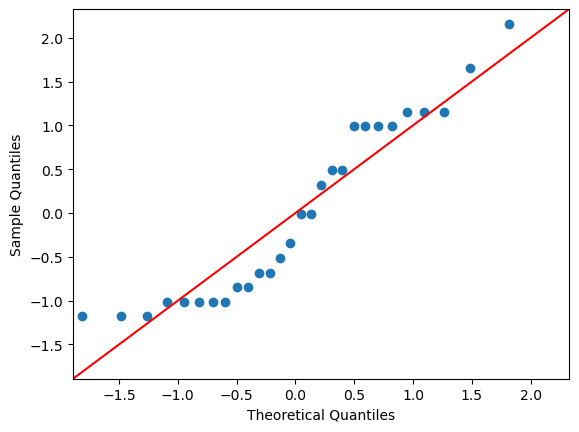

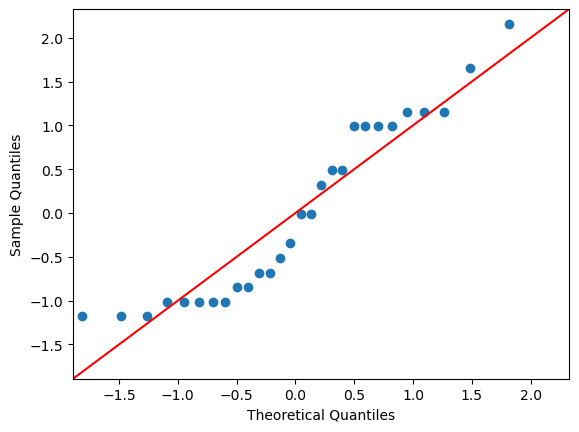

In [46]:
sm.qqplot(df['Productivity'], line='45', fit=True)

In [48]:
from scipy.stats import shapiro

shapiro(df['Productivity'])

ShapiroResult(statistic=0.8922788988362809, pvalue=0.007579984646856594)

<Axes: xlabel='Productivity', ylabel='Count'>

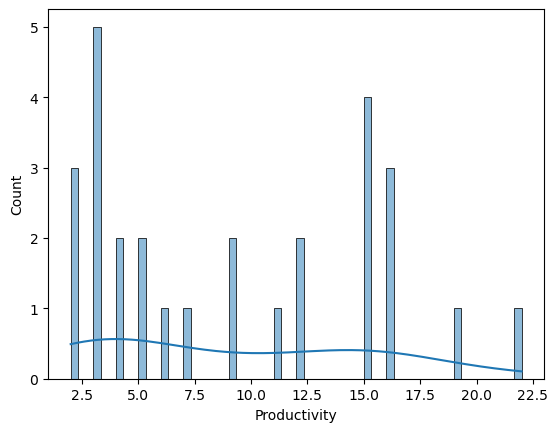

In [50]:
import seaborn as sb

sb.histplot(df['Productivity'], bins=60, kde=True)

In [59]:
from scipy.stats import normaltest

stat, p = normaltest(df['Productivity'])

print(stat, p)

5.280584154964437 0.0713404295800382


In [61]:
alpha = 0.05

if p > alpha:
    print("Sample looks Gaussian (H0 accepted)")
else:
    print("Sample doesn't looks Gaussian (H0 rejected)")
    

Sample looks Gaussian (H0 accepted)


In [63]:
normaltest(df['Productivity'])

NormaltestResult(statistic=5.280584154964437, pvalue=0.0713404295800382)

In [116]:
from scipy.stats import anderson

result = anderson(df['Productivity'])
print(result)

AndersonResult(statistic=1.1570856034880883, critical_values=array([0.518, 0.59 , 0.708, 0.826, 0.983]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=9.071428571428571, scale=6.097531810486451)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [118]:
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print("Data looks normal (accept H0)")
    else:
        print("Data doesn't look normal (reject H0)")

Data doesn't look normal (reject H0)
Data doesn't look normal (reject H0)
Data doesn't look normal (reject H0)
Data doesn't look normal (reject H0)
Data doesn't look normal (reject H0)


<Axes: xlabel='Total Screen Time ', ylabel='Count'>

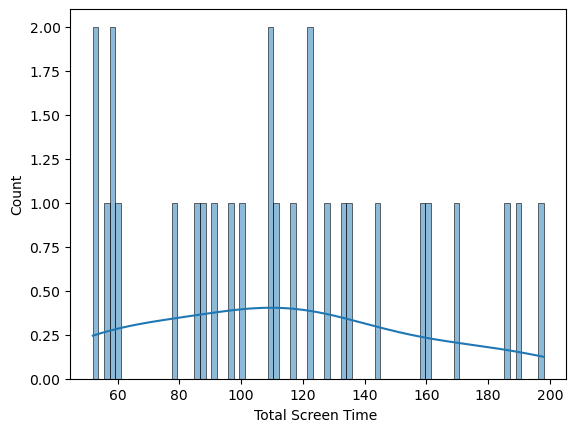

In [120]:
sb.histplot(df['Total Screen Time '], bins = 80, kde=True)

In [122]:
result2 = anderson(df['Total Screen Time '])
print(result2)

AndersonResult(statistic=0.3268223690655816, critical_values=array([0.518, 0.59 , 0.708, 0.826, 0.983]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=113.25, scale=43.562322320164775)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [124]:
for i in range(len(result2.critical_values)):
    sl, cv = result2.significance_level[i], result2.critical_values[i]
    if result2.statistic < result2.critical_values[i]:
        print("Data looks normal (accept H0)")
    else:
        print("Data doesn't look normal (reject H0)")

Data looks normal (accept H0)
Data looks normal (accept H0)
Data looks normal (accept H0)
Data looks normal (accept H0)
Data looks normal (accept H0)
